<a href="https://colab.research.google.com/github/Lucas-GStark/ML-Neural-Networks/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Convolutional nn: Convolutional layers tryes to find local patterns within the image 
# Dense nn: Densly connected layers tryes to find global patterns (each node have acess to every data from previous nodes)  

In [82]:
(image_train, label_train), (image_test, label_test) = datasets.cifar10.load_data()

Text(0.5, 1.0, 'This is a: cat')

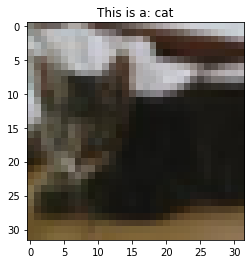

In [64]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

index = 9
title = str(class_names[int(label_train[index])])

plt.imshow(image_train[index])
plt.title(f"This is a: {title}")

In [5]:
image_train = image_train/255.0
image_test = image_test/255.0
# A feature map stands for a 3d tensor with width, heirh and one depth axis

In [6]:
 # Convolutional layers work together by increasing complexity and abstraction at each subsequent layer
 # Cnn architecture: A stack of Conv2D and MaxPooling2D layers followed by a few densely connected layers
  #The idea is that the stack of convolutional and maxPooling layers extract the features from the image 
  #Then these features are flattened and fed to densly connected layers that determine the class of an image based 
  #on the presence of features
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [10]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
model.fit(image_train, label_train, epochs=10, validation_data=(image_test, label_test))

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.7218 - accuracy: 0.3583 - val_loss: 1.1996 - val_accuracy: 0.5769
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1621 - accuracy: 0.5899 - val_loss: 1.0446 - val_accuracy: 0.6337
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9766 - accuracy: 0.6586 - val_loss: 0.9336 - val_accuracy: 0.6722
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8831 - accuracy: 0.6911 - val_loss: 0.9162 - val_accuracy: 0.6820
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7963 - accuracy: 0.7201 - val_loss: 0.8548 - val_accuracy: 0.7034
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7263 - accuracy: 0.7453 - val_loss: 0.8543 - val_accuracy: 0.7022
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6705 - accuracy: 0.7675 - val_loss: 0.8392 -

In [22]:
test_loss, test_accuracy = model.evaluate(image_test, label_test, verbose=2)

313/313 - 4s - loss: 0.8959 - accuracy: 0.7158


In [83]:
predictions = model.predict(image_test)
prediction = []
for i in range(0, len(label_test)):
  prediction.append(np.argmax(predictions[i]))

In [94]:
pd.DataFrame({
    "Actual Value": label_test.tolist(),
    "Predicted Value": prediction
}, index=range(1, len(prediction)+1))

,Actual Value,Predicted Value
1,[3],3
2,[8],8
3,[8],8
4,[0],0
5,[6],1
...,...,...
9996,[8],8
9997,[3],5
9998,[5],5
9999,[1],1
